Import

In [55]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
from keras.callbacks import LearningRateScheduler
from keras.regularizers import l1
from keras.models import Model
from keras.layers import Input, Dense, Concatenate

Load dataset

In [56]:
data = pd.read_csv('/content/diabetes.csv')

In [57]:
# from google.colab import drive
# drive.mount('/content/drive')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [59]:
correlation_matrix = data.corr()
correlation_matrix
# Display the correlation values between features and 'Glucose'
correlation_with_glucose = correlation_matrix['Outcome'].sort_values(ascending=False)
print(correlation_with_glucose)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [60]:
correlation_threshold = 0.22
selected_features = correlation_with_glucose[abs(correlation_with_glucose) >= correlation_threshold].index
data_selected = data[selected_features]
print(data_selected.head())


   Outcome  Glucose   BMI  Age  Pregnancies
0        1      148  33.6   50            6
1        0       85  26.6   31            1
2        1      183  23.3   32            8
3        0       89  28.1   21            1
4        1      137  43.1   33            0


In [61]:
features = data_selected.drop('Outcome',axis=1)
target = data_selected['Outcome']

In [62]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(features)
#X_normalized = scaler.fit_transform(data_selected)

In [63]:
X_train,X_test,y_train, y_test = train_test_split(X_normalized,target,test_size=0.15,random_state =200)


In [64]:
oversampler = SMOTE(random_state=200)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

Build Model

In [65]:
def create_model_1():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [66]:
def create_model_2():
    model = Sequential([
        Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [67]:
# Create and train individual models
model1 = create_model_1()
model2 = create_model_2()

history1 = model1.fit(X_train_oversampled, y_train_oversampled, epochs=100, batch_size=32, validation_split=0.18, verbose=1, callbacks=[es])
history2 = model2.fit(X_train_oversampled, y_train_oversampled, epochs=100, batch_size=32, validation_split=0.18, verbose=1, callbacks=[es])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.7377 - loss: 0.6524 - val_accuracy: 0.5855 - val_loss: 0.6407
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7811 - loss: 0.5260 - val_accuracy: 0.5724 - val_loss: 0.6667
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7252 - loss: 0.5151 - val_accuracy: 0.5855 - val_loss: 0.6465
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7182 - loss: 0.5095 - val_accuracy: 0.6053 - val_loss: 0.6289
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7352 - loss: 0.4906 - val_accuracy: 0.6053 - val_loss: 0.6088
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7225 - loss: 0.5038 - val_accuracy: 0.6513 - val_loss: 0.5788
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7363 - loss: 0.5044 - val_accuracy: 0.5987 - val_loss: 0.6301
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7628 - loss: 0.4855 - val_accuracy: 0.6776 - val_loss: 0.

In [68]:
# Combine models using a simple stacking method
input_layer = Input(shape=(X_train.shape[1],))
model_1_out = model1(input_layer)
model_2_out = model2(input_layer)

combined = Concatenate()([model_1_out, model_2_out])
final_output = Dense(1, activation='sigmoid')(combined)

ensemble_model = Model(inputs=input_layer, outputs=final_output)
ensemble_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [69]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [70]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [71]:
history = ensemble_model.fit(X_train_oversampled, y_train_oversampled, epochs=100, batch_size=32, validation_split=0.18, verbose=1, callbacks=[es])


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.4678 - loss: 0.0000e+00 - val_accuracy: 0.9211 - val_loss: 0.0000e+00
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7387 - loss: 0.0000e+00 - val_accuracy: 0.8553 - val_loss: 0.0000e+00
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7582 - loss: 0.0000e+00 - val_accuracy: 0.8421 - val_loss: 0.0000e+00
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7746 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.0000e+00
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7807 - loss: 0.0000e+00 - val_accuracy: 0.8092 - val_loss: 0.0000e+00
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7807 - loss: 0.0000e+00 - val_accuracy: 0.6776 - val_loss: 0.0000e+00
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8013 - loss: 0.0000e+00 - val_accuracy: 0.7763 - val_loss: 0.0000e+00
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - 

In [72]:
ensemble_model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.6585 - loss: 0.0000e+00


[0.0, 0.0, 0.6724137663841248, 0.0, 0.6724137663841248, 0.6724137663841248]

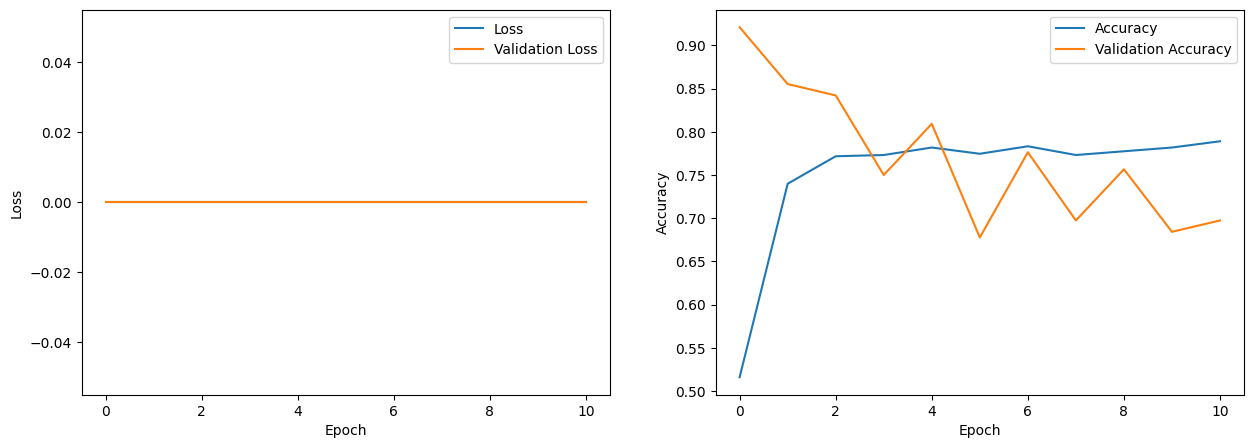

In [73]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(loss, label='Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(accuracy, label='Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.show()

In [74]:
from sklearn.metrics import classification_report

In [75]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print(report)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        78
           1       0.88      0.37      0.52        38

    accuracy                           0.78       116
   macro avg       0.82      0.67      0.69       116
weighted avg       0.80      0.78      0.74       116

